In [6]:
### Some initializations
import sys
sys.path.append("..")
import numpy as np
import math
import random
import copy
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import pickle
import warnings
from scipy.stats import beta
import itertools
import loli
from matplotlib.patches import Patch
plt.rcParams.update({
    "text.usetex": True
})

In [7]:
def yerr(tot,res,alpha=0.05):
    yerrbar=np.zeros((2,len(res)))
    for i in range(len(res)):

        k=res[i]*tot
        n=tot
        p_u, p_o = beta.ppf([alpha/2, 1 - alpha/2], [k, k + 1], [n - k + 1, n - k])
        yerrbar[0,i]=k/n-p_u
        yerrbar[1,i]=p_o-k/n
    return yerrbar

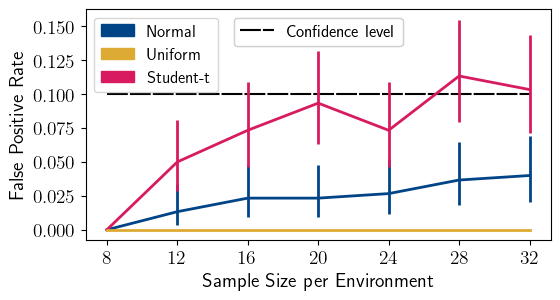

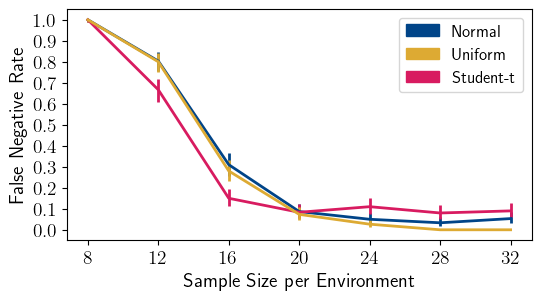

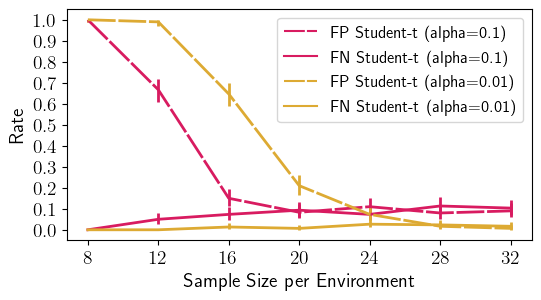

In [8]:
## Creating Figures 1,2,6

with open('BaselineB=1000.pkl','rb') as f:
    Baseline=pickle.load(f)

runs=300

fpt=Baseline['fpt']
fnt=Baseline['fnt']
fptrunc=Baseline['fptrunc']
fntrunc=Baseline['fntrunc']
fp=Baseline['fp']
fn=Baseline['fn']
fptruncbiga=Baseline['fptruncbiga']
fntruncbiga=Baseline['fntruncbiga']
fptsmalla=Baseline['fptsmalla']
fntsmalla=Baseline['fntsmalla']
sample=Baseline['sample']
    
fig, ax = plt.subplots(figsize=(6,3))
plt.xticks(sample)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)


normal = Patch( color='#004488',label='Normal')
trunc = Patch(color='#DDAA33',label='Uniform')
student = Patch(color='#D81B60',label='Student-t')


studentfn01 = plt.Line2D([], [],color='#D81B60',label='FP Student-t (alpha=0.1)',linestyle=(0, (10, 1)))
studentfp01 = plt.Line2D([], [],color='#D81B60',label='FN Student-t (alpha=0.1)')
studentfn001 =plt.Line2D([], [],color='#DDAA33',label='FP Student-t (alpha=0.01)',linestyle=(0, (10, 1)))
studentfp001 = plt.Line2D([], [],color='#DDAA33',label='FN Student-t (alpha=0.01)')
conf= plt.Line2D([], [], color='black',label='Confidence level',linestyle=(0, (10, 1)))

plt.plot(sample,0.1*np.ones((len(sample))),label='Confidence level',color='black',linestyle=(0, (10, 1)))
plt.errorbar(sample,fp,yerr=yerr(runs,fp),c='#004488',linewidth=2)
plt.errorbar(sample,fpt,yerr=yerr(runs,fpt),c='#D81B60',linewidth=2)
plt.errorbar(sample,fptrunc,yerr=yerr(runs,fptrunc),c='#DDAA33',linewidth=2)

legend1=ax.legend(handles=[normal,trunc,student],fontsize=12)
legend2=ax.legend(handles=[conf],fontsize=12,loc=9)
plt.xlabel('Sample Size per Environment',fontsize=14)
plt.ylabel('False Positive Rate',fontsize=14)
ax.add_artist(legend1)
ax.add_artist(legend2)
plt.savefig('FalsePositiveRate.pdf',bbox_inches="tight",format='pdf')



fig, ax = plt.subplots(figsize=(6,3))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.errorbar(sample,fn,yerr=yerr(runs,fn),c='#004488',linewidth=2)
plt.errorbar(sample,fnt,yerr=yerr(runs,fnt),c='#D81B60',linewidth=2)
plt.errorbar(sample,fntrunc,yerr=yerr(runs,fntrunc),c='#DDAA33',linewidth=2)
ax.legend(handles=[normal,trunc,student],fontsize=12)
plt.xlabel('Sample Size per Environment',fontsize=14)
plt.xticks(sample)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.ylabel('False Negative Rate',fontsize=14)
plt.savefig('FalseNegativeRate.pdf',bbox_inches="tight",format='pdf')

    
fig, ax = plt.subplots(figsize=(6,3))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.errorbar(sample,fnt,yerr=yerr(runs,fnt),c='#D81B60',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(sample,fpt,yerr=yerr(runs,fpt),c='#D81B60',linewidth=2)
plt.errorbar(sample,fntsmalla,yerr=yerr(runs,fntsmalla),c='#DDAA33',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(sample,fptsmalla,yerr=yerr(runs,fptsmalla),c='#DDAA33',linewidth=2)
ax.legend(handles=[studentfn01,studentfp01,studentfn001,studentfp001],fontsize=12)
plt.xlabel('Sample Size per Environment',fontsize=14)
plt.xticks(sample)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.ylabel('Rate',fontsize=14)
plt.savefig('StudentTAlphaAdjust.pdf',bbox_inches="tight",format='pdf')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

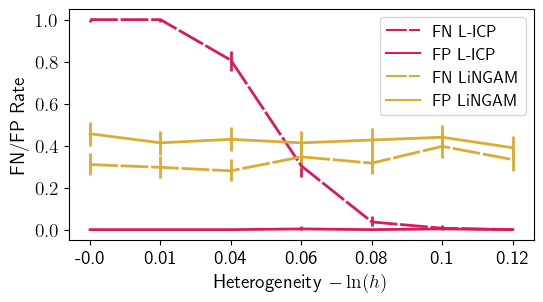

In [9]:
# Creating Figure 3

with open('ComparisonLingUniformB=1000.pkl','rb') as f:
    ComparisonLingHetero=pickle.load(f)

runs=300

fp=np.flip(ComparisonLingHetero['fptrunc'])
fn=np.flip(ComparisonLingHetero['fntrunc'])
fnling=np.flip(ComparisonLingHetero['fnlingtrunc'])
fpling=np.flip(ComparisonLingHetero['fplingtrunc'])
hetero=np.flip(ComparisonLingHetero['hetero'])

fig, ax = plt.subplots(figsize=(6,3))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)



fnloli = plt.Line2D([], [], color='#D81B60',label='FN L-ICP',linestyle=(0, (10, 1)))
fploli= plt.Line2D([], [], color='#D81B60',label='FP L-ICP')
fnlingam = plt.Line2D([], [], color='#DDAA33',label='FN LiNGAM',linestyle=(0, (10, 1)))
fplingam = plt.Line2D([], [], color='#DDAA33',label='FP LiNGAM')

IS=(5)/(np.array(hetero)**4*4+1)
h=IS**(1/4)*np.exp(1-IS**(1/4))
xvals=(np.round(-np.log(h),2)).astype('str')
plt.errorbar(xvals,(fn),yerr=yerr(runs,(fn)),c='#D81B60',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(xvals,(fp),yerr=yerr(runs,(fp)),c='#D81B60',linewidth=2)
plt.errorbar(xvals,(fnling),yerr=yerr(runs,(fnling)),c='#DDAA33',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(xvals,(fpling),yerr=yerr(runs,(fpling)),c='#DDAA33',linewidth=2)
plt.xticks(xvals)
ax.legend(handles=[fnloli,fploli,fnlingam,fplingam],fontsize=12)
plt.xlabel('Heterogeneity $-\ln(h)$',fontsize=14)
plt.ylabel('FN/FP Rate',fontsize=14)
plt.savefig('ComparisonLingamUniform.pdf',bbox_inches="tight",format='pdf')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

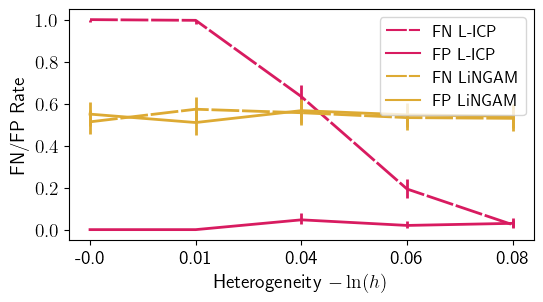

In [10]:
# Creating Figure 4

with open('ComparisonLingNormalB=1000.pkl','rb') as f:
    ComparisonLingHetero=pickle.load(f)

runs=300

fp=ComparisonLingHetero['fp']
fn=ComparisonLingHetero['fn']
fnling=ComparisonLingHetero['fnling']
fpling=ComparisonLingHetero['fpling']
hetero=ComparisonLingHetero['hetero']

fig, ax = plt.subplots(figsize=(6,3))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)



fnloli = plt.Line2D([], [], color='#D81B60',label='FN L-ICP',linestyle=(0, (10, 1)))
fploli= plt.Line2D([], [], color='#D81B60',label='FP L-ICP')
fnlingam = plt.Line2D([], [], color='#DDAA33',label='FN LiNGAM',linestyle=(0, (10, 1)))
fplingam = plt.Line2D([], [], color='#DDAA33',label='FP LiNGAM')

IS=(5)/(np.array(hetero)**4*4+1)
h=IS**(1/4)*np.exp(1-IS**(1/4))
xvals=(np.round(-np.log(h),2)).astype('str')
plt.errorbar(xvals,(fn),yerr=yerr(runs,(fn)),c='#D81B60',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(xvals,(fp),yerr=yerr(runs,(fp)),c='#D81B60',linewidth=2)
plt.errorbar(xvals,(fnling),yerr=yerr(runs,(fnling)),c='#DDAA33',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(xvals,(fpling),yerr=yerr(runs,(fpling)),c='#DDAA33',linewidth=2)
plt.xticks(xvals)
ax.legend(handles=[fnloli,fploli,fnlingam,fplingam],fontsize=12)
plt.xlabel('Heterogeneity $-\ln(h)$',fontsize=14)
plt.ylabel('FN/FP Rate',fontsize=14)
plt.savefig('ComparisonLingamNormal.pdf',bbox_inches="tight",format='pdf')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

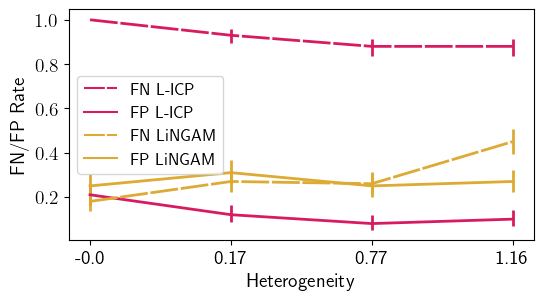

In [11]:
# Creating Figure 8a

with open('ComparisonLingStudentT=3B=1000.pkl','rb') as f:
    ComparisonLingHetero=pickle.load(f)

runs=300
fp=ComparisonLingHetero['fpt']
fn=ComparisonLingHetero['fnt']
fnling=ComparisonLingHetero['fnlingt']
fpling=ComparisonLingHetero['fplingt']
hetero=ComparisonLingHetero['hetero']

fig, ax = plt.subplots(figsize=(6,3))
plt.xticks(hetero)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)



fnloli = plt.Line2D([], [], color='#D81B60',label='FN L-ICP',linestyle=(0, (10, 1)))
fploli= plt.Line2D([], [], color='#D81B60',label='FP L-ICP')
fnlingam = plt.Line2D([], [], color='#DDAA33',label='FN LiNGAM',linestyle=(0, (10, 1)))
fplingam = plt.Line2D([], [], color='#DDAA33',label='FP LiNGAM')

IS=(5)/(np.array(hetero)**4*4+1)
h=IS**(1/4)*np.exp(1-IS**(1/4))
xvals=(np.round(-np.log(h),2)).astype('str')
plt.errorbar(xvals,(fn),yerr=yerr(runs,(fn)),c='#D81B60',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(xvals,(fp),yerr=yerr(runs,(fp)),c='#D81B60',linewidth=2)
plt.errorbar(xvals,(fnling),yerr=yerr(runs,(fnling)),c='#DDAA33',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(xvals,np.flip(fpling),yerr=yerr(runs,np.flip(fpling)),c='#DDAA33',linewidth=2)
plt.xticks(xvals)
ax.legend(handles=[fnloli,fploli,fnlingam,fplingam],fontsize=12)
plt.xlabel('Heterogeneity',fontsize=14)
plt.ylabel('FN/FP Rate',fontsize=14)

plt.savefig('ComparisonLingamStudent_tT=3.pdf',bbox_inches="tight",format='pdf')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

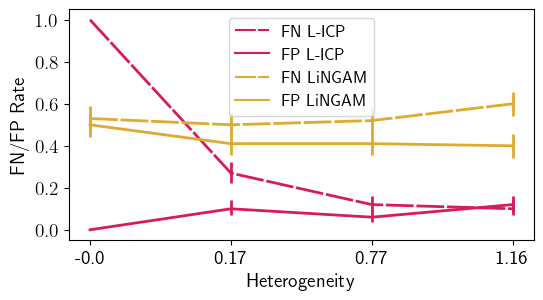

In [12]:
# Creating Figure 8b


with open('ComparisonLingStudentT=10B=1000.pkl','rb') as f:
    ComparisonLingHetero=pickle.load(f)

runs=300
fp=ComparisonLingHetero['fpt']
fn=ComparisonLingHetero['fnt']
fnling=ComparisonLingHetero['fnlingt']
fpling=ComparisonLingHetero['fplingt']
hetero=ComparisonLingHetero['hetero']

fig, ax = plt.subplots(figsize=(6,3))
plt.xticks(hetero)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)



fnloli = plt.Line2D([], [], color='#D81B60',label='FN L-ICP',linestyle=(0, (10, 1)))
fploli= plt.Line2D([], [], color='#D81B60',label='FP L-ICP')
fnlingam = plt.Line2D([], [], color='#DDAA33',label='FN LiNGAM',linestyle=(0, (10, 1)))
fplingam = plt.Line2D([], [], color='#DDAA33',label='FP LiNGAM')

IS=(5)/(np.array(hetero)**4*4+1)
h=IS**(1/4)*np.exp(1-IS**(1/4))
xvals=(np.round(-np.log(h),2)).astype('str')
plt.errorbar(xvals,(fn),yerr=yerr(runs,(fn)),c='#D81B60',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(xvals,(fp),yerr=yerr(runs,(fp)),c='#D81B60',linewidth=2)
plt.errorbar(xvals,(fnling),yerr=yerr(runs,(fnling)),c='#DDAA33',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(xvals,np.flip(fpling),yerr=yerr(runs,np.flip(fpling)),c='#DDAA33',linewidth=2)
plt.xticks(xvals)
ax.legend(handles=[fnloli,fploli,fnlingam,fplingam],fontsize=12)
plt.xlabel('Heterogeneity',fontsize=14)
plt.ylabel('FN/FP Rate',fontsize=14)

plt.savefig('ComparisonLingamStudent_tT=10.pdf',bbox_inches="tight",format='pdf')
plt.show